In [ ]:
!pip install kaggle

# Upload your kaggle.json file to Colab
from google.colab import files
files.upload()  # Select your kaggle.json file

# Move the file to the right location and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download the dataset
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

# Unzip the dataset
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Explore dataset structure
def explore_dataset_structure(path="."):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, "").count(os.sep)
        indent = " " * 2 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = " " * 2 * (level + 1)

        # Show first few files
        for file in files[:3]:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"{subindent}{file}")

        if len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]) > 3:
            image_count = len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            print(f"{subindent}... and {image_count-3} more images")

print("Dataset structure:")
explore_dataset_structure()

Dataset structure:
./
  .config/
    configurations/
    logs/
      2025.08.12/
  test/
    test/
      PotatoEarlyBlight3.JPG
      TomatoHealthy4.JPG
      TomatoYellowCurlVirus3.JPG
      ... and 30 more images
  New Plant Diseases Dataset(Augmented)/
    New Plant Diseases Dataset(Augmented)/
      valid/
        Tomato___Bacterial_spot/
          014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG
          7b4845c4-e8c2-4e8e-93f1-5c9639c9995a___GCREC_Bact.Sp 3272.JPG
          98ebc6ae-4ce1-4332-a55c-f6756edb6459___GCREC_Bact.Sp 3232.JPG
          ... and 422 more images
        Cherry_(including_sour)___healthy/
          167f246d-d93a-4a00-bcb0-5b189400a0ee___JR_HL 9547_180deg.JPG
          24b19cb2-3c70-4ce7-9001-e2a1af47d5f2___JR_HL 4261_flipTB.JPG
          f9905e57-5799-4122-9626-d2e575e60389___JR_HL 9743_180deg.JPG
          ... and 453 more images
        Raspberry___healthy/
          c8b7f062-ef8a-4f2f-bc06-6c63e52b645e___Mary_HL 6312_90deg.JPG
          e2bc

In [ ]:
# Count images in each category
def count_images_by_category():
    categories = {}

    for root, dirs, files in os.walk("."):
        if any(f.lower().endswith(('.png', '.jpg', '.jpeg')) for f in files):
            category = os.path.basename(root)
            image_count = len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            if image_count > 0:
                categories[category] = image_count

    return categories

categories = count_images_by_category()
print("\nImages per category:")
for category, count in sorted(categories.items()):
    print(f"{category}: {count} images")

print(f"\nTotal categories: {len(categories)}")
print(f"Total images: {sum(categories.values())}")


Images per category:
Apple___Apple_scab: 2016 images
Apple___Black_rot: 1987 images
Apple___Cedar_apple_rust: 1760 images
Apple___healthy: 2008 images
Blueberry___healthy: 1816 images
Cherry_(including_sour)___Powdery_mildew: 1683 images
Cherry_(including_sour)___healthy: 1826 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642 images
Corn_(maize)___Common_rust_: 1907 images
Corn_(maize)___Northern_Leaf_Blight: 1908 images
Corn_(maize)___healthy: 1859 images
Grape___Black_rot: 1888 images
Grape___Esca_(Black_Measles): 1920 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 images
Grape___healthy: 1692 images
Orange___Haunglongbing_(Citrus_greening): 2010 images
Peach___Bacterial_spot: 1838 images
Peach___healthy: 1728 images
Pepper,_bell___Bacterial_spot: 1913 images
Pepper,_bell___healthy: 1988 images
Potato___Early_blight: 1939 images
Potato___Late_blight: 1939 images
Potato___healthy: 1824 images
Raspberry___healthy: 1781 images
Soybean___healthy: 2022 images
Squas

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the training and validation directories
train_dir = 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Define image dimensions and batch size
img_height = 224
img_width = 224
batch_size = 64

# Create ImageDataGenerators for training and validation
# You can add data augmentation parameters to the training generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=batch_size,
                                               class_mode='categorical')

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


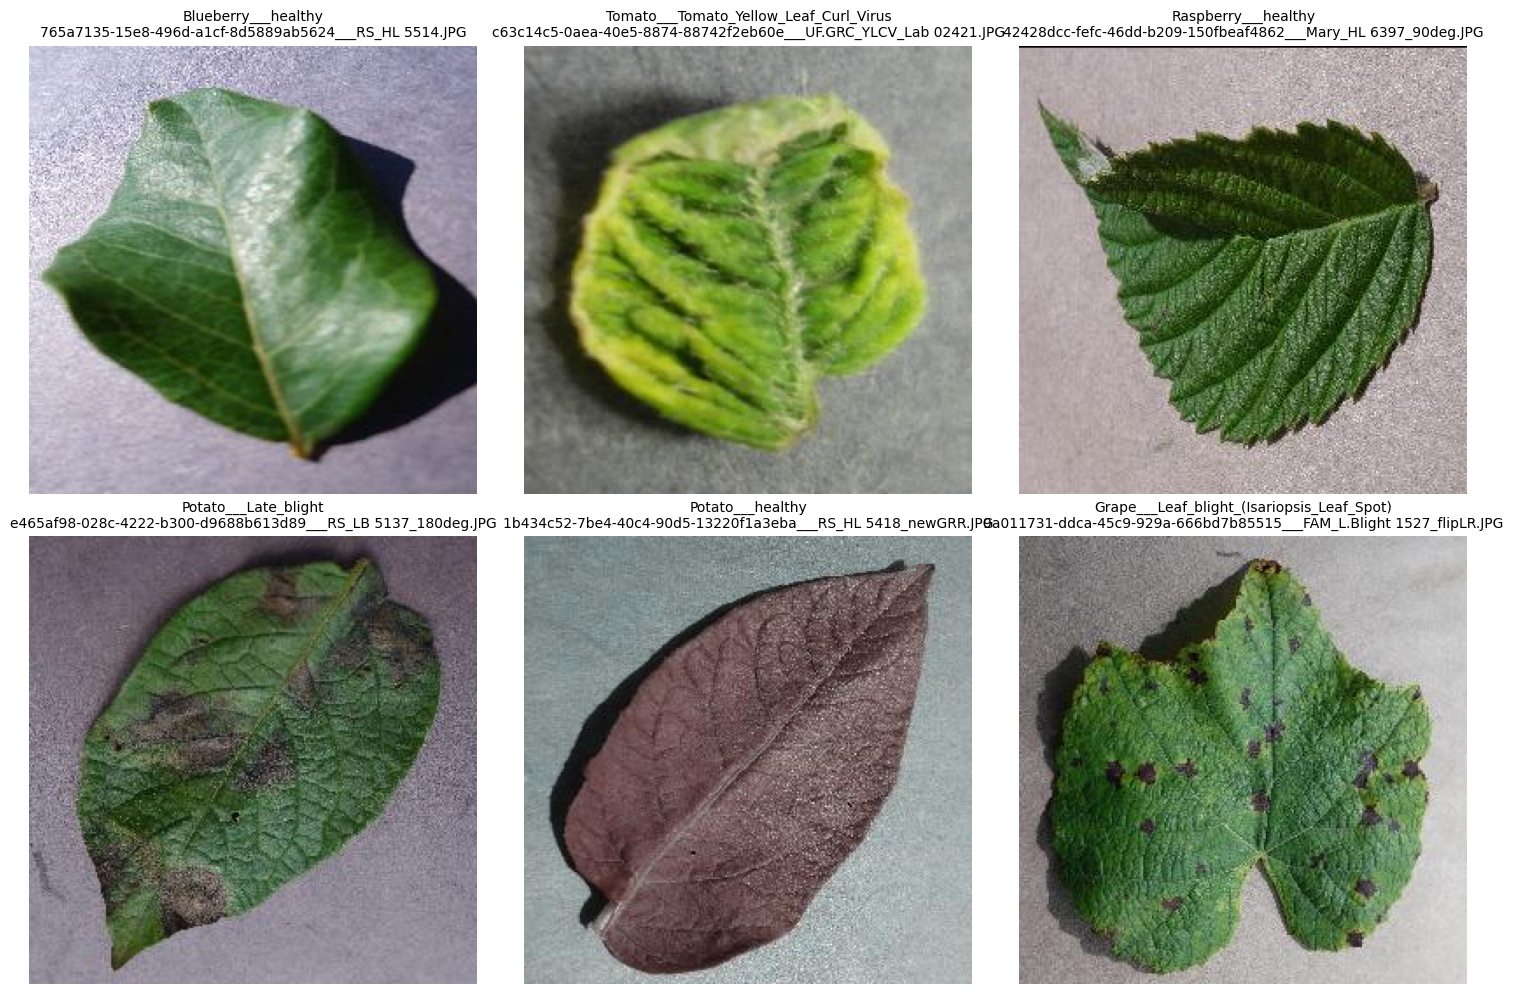

In [ ]:
# Display sample images from different categories
import random

def show_sample_images(num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    # Get random categories
    sample_categories = random.sample(list(categories.keys()), min(num_samples, len(categories)))

    for i, category in enumerate(sample_categories):
        # Find images in this category
        for root, dirs, files in os.walk("."):
            if os.path.basename(root) == category:
                image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
                if image_files:
                    # Pick random image
                    random_image = random.choice(image_files)
                    img_path = os.path.join(root, random_image)

                    # Load and display image
                    img = Image.open(img_path)
                    axes[i].imshow(img)
                    axes[i].set_title(f"{category}\n{random_image}", fontsize=10)
                    axes[i].axis('off')
                    break

    plt.tight_layout()
    plt.show()

show_sample_images()

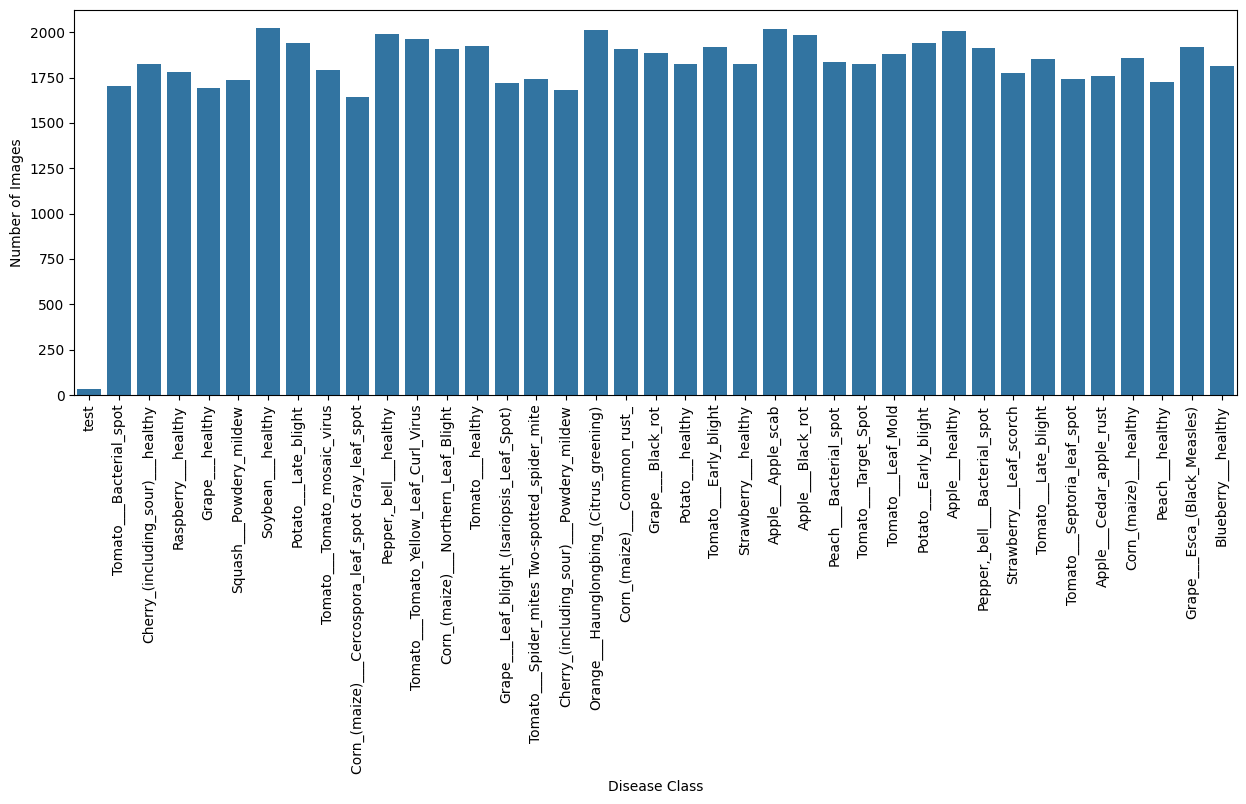

In [ ]:
import pandas as pd
import seaborn as sns

dic = {}
for Class in categories:
    dic[Class] = categories[Class]

df = pd.DataFrame(list(dic.items()), columns=["Disease Class", "Number of Images"])

# df = df.sort_values(by="Number of Images", ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=df ,x='Disease Class' ,y= 'Number of Images' )
plt.xticks(rotation=90)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import GlorotNormal

model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3), kernel_initializer=GlorotNormal()))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(38, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,446 (1.39 MB)

 Trainable params: 364,550 (1.39 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Freeze the layers of the base_model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
predictions = Dense(len(categories)-1, activation='softmax')(x) # Subtract 1 for the 'test' category

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,372,742 (85.35 MB)

 Trainable params: 569,062 (2.17 MB)

 Non-trainable params: 21,803,680 (83.17 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,372,742 (85.35 MB)

 Trainable params: 569,062 (2.17 MB)

 Non-trainable params: 21,803,680 (83.17 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = '/content/drive/MyDrive/inceptionv3_plant_disease_model.keras'

model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

# Train the model
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=10,
                    callbacks=[model_checkpoint, early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.5796 - loss: 1.5602
Epoch 1: val_accuracy improved from -inf to 0.84401, saving model to /content/drive/MyDrive/inceptionv3_plant_disease_model.keras
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 914s 808ms/step - accuracy: 0.5797 - loss: 1.5597 - val_accuracy: 0.8440 - val_loss: 0.4803
Epoch 2/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.8295 - loss: 0.5492
Epoch 2: val_accuracy improved from 0.84401 to 0.88021, saving model to /content/drive/MyDrive/inceptionv3_plant_disease_model.keras
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 853s 776ms/step - accuracy: 0.8295 - loss: 0.5492 - val_accuracy: 0.8802 - val_loss: 0.3613
Epoch 3/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.8520 - loss: 0.4683
Epoch 3: val_accuracy did not improve from 0.88021
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 834s 759ms/step - accuracy: 0.8520 - loss: 0.4683 - val_accuracy: 0.8743 - val_loss: 0.3830
Epoch 4/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 0s 73

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = loaded_model.evaluate(valid_data)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 54s 162ms/step - accuracy: 0.9163 - loss: 0.2520
Validation Loss: 0.2546
Validation Accuracy: 0.9151


In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
loaded_model = load_model(checkpoint_path)

Making predictions on sample test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


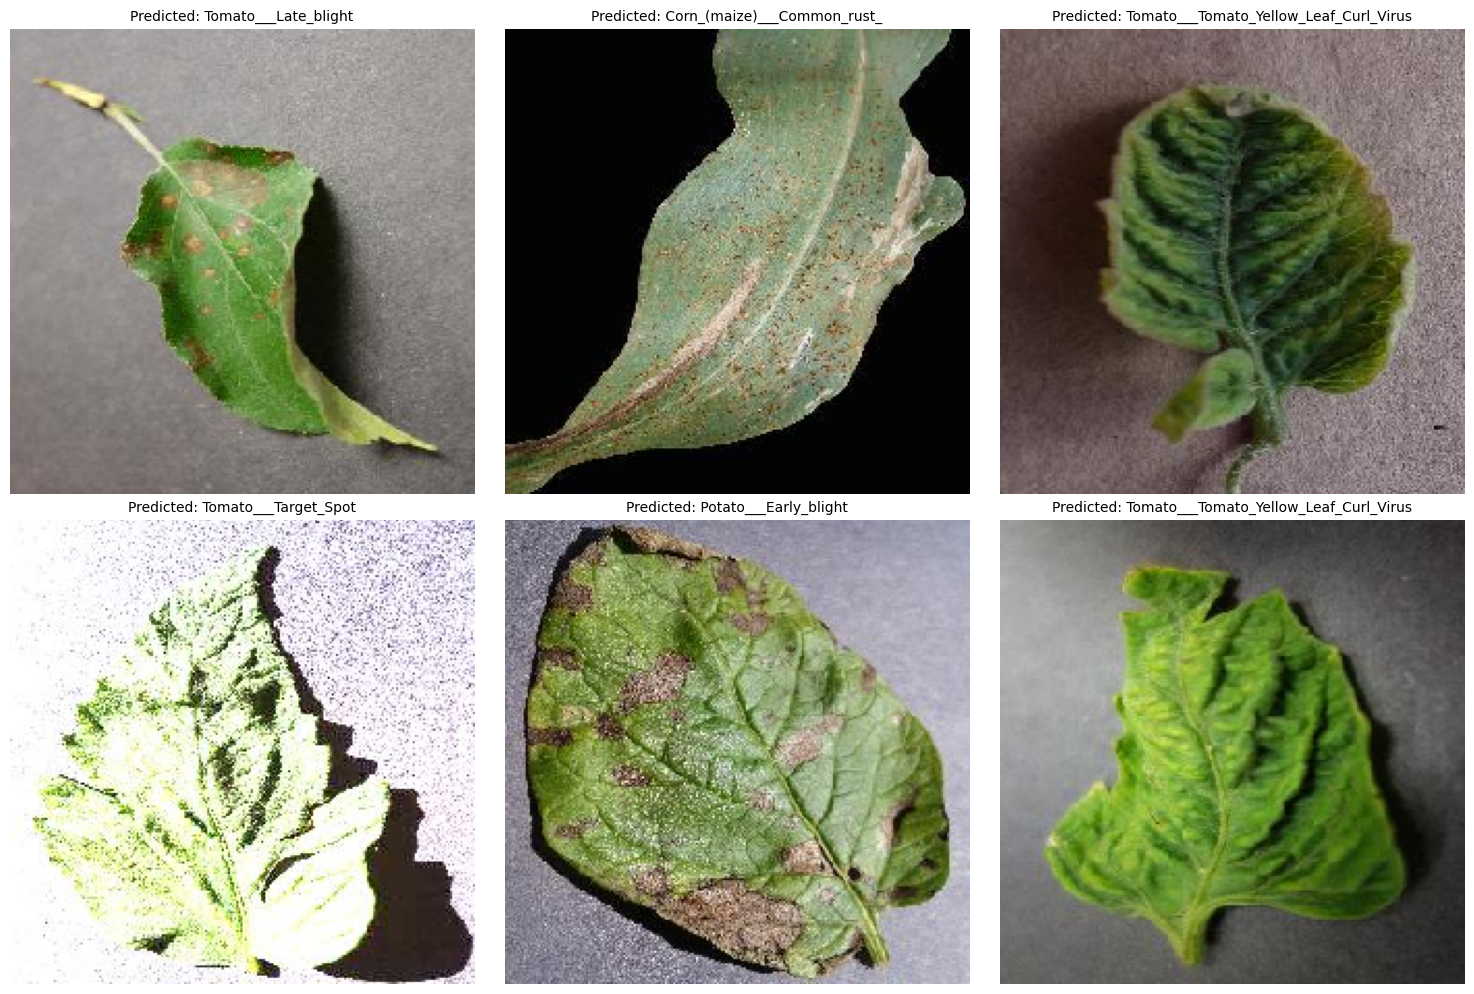

In [ ]:
import random
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Get the test directory path
test_dir = 'test/test'

# Get the list of image files in the test directory
test_image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            test_image_files.append(os.path.join(root, file))


def predict_and_show_sample_images(num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    # Get random sample of image paths
    sample_image_paths = random.sample(test_image_files, min(num_samples, len(test_image_files)))

    # Get class names from the training data generator
    class_names = list(train_data.class_indices.keys())

    for i, img_path in enumerate(sample_image_paths):
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Rescale the same way as training data

        # Make prediction
        predictions = loaded_model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class_index]

        # Get the true label from the directory structure
        true_label = os.path.basename(os.path.dirname(img_path))


        # Display image and prediction
        axes[i].imshow(img)
        axes[i].set_title(f"Predicted: {predicted_class_name}", fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("Making predictions on sample test images...")
predict_and_show_sample_images()

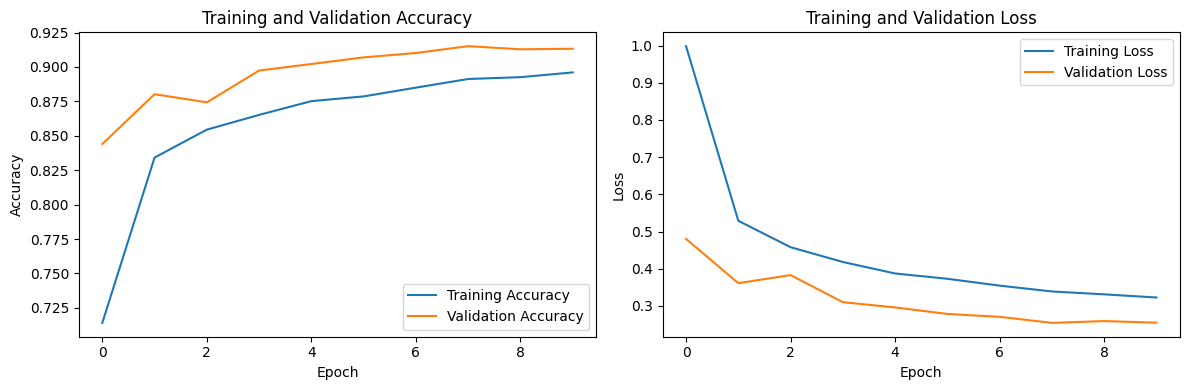

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ValueError: Mountpoint must not already contain files

In [ ]:
from google.colab import drive
# Try unmounting first
try:
  drive.flush_and_unmount()
except ValueError:
  pass
# Then mount with force_remount
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.


ValueError: Mountpoint must not already contain files